In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sentinelhub import WebFeatureService, BBox, CRS, DataSource, SHConfig

INSTANCE_ID = '1b704a3d-83c6-49c8-8d35-d472673fe052'  # In case you put instance ID into configuration file you can leave this unchanged

if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID
else:
    config = None


search_bbox = BBox(bbox=[46.16, -16.15, 46.51, -15.58], crs=CRS.WGS84)
search_time_interval = ('2017-12-01T00:00:00', '2017-12-15T23:59:59')


wfs_iterator = WebFeatureService(
    search_bbox,
    search_time_interval,
    data_source=DataSource.SENTINEL2_L1C,
    maxcc=1.0,
    config=config
)

for tile_info in wfs_iterator:
    print(tile_info)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}}, 'coordinates': [[[[45.93178396701427, -15.374656928849852], [46.95453856838988, -15.368029754563597], [46.96412360581364, -16.360077552492225], [45.93635618696065, -16.3671551019236], [45.93178396701427, -15.374656928849852]]]]}, 'properties': {'id': 'S2B_OPER_MSI_L1C_TL_MTI__20171215T085654_A004050_T38LPH_N02.06', 'date': '2017-12-15', 'time': '07:12:03', 'path': 's3://sentinel-s2-l1c/tiles/38/L/PH/2017/12/15/0', 'crs': 'EPSG:32738', 'mbr': '600000,8190220 709800,8300020', 'cloudCoverPercentage': 28.27}}
{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}}, 'coordinates': [[[[45.93178396701427, -15.374656928849852], [46.95453856838988, -15.368029754563597], [46.96412360581364, -16.360077552492225], [45.93635618696065, -16.3671551019236], [45.93178396701427, -15.374656928

In [4]:
wfs_iterator.get_tiles()


[('38LPH', '2017-12-15', 0),
 ('38LPH', '2017-12-10', 0),
 ('38LPH', '2017-12-5', 0)]

In [5]:
from sentinelhub import get_area_info

for tile_info in get_area_info(search_bbox, search_time_interval, maxcc=0.5):
    print(tile_info)

{'type': 'Feature', 'id': '985b7c0c-5d4a-5105-a37b-ef41f4092392', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[45.931783967, -15.374656929], [46.954538568, -15.368029755], [46.964123606, -16.360077552], [45.936356187, -16.367155102], [45.931783967, -15.374656929]]]]}, 'properties': {'collection': 'Sentinel2', 'license': {'licenseId': 'unlicensed', 'hasToBeSigned': 'never', 'grantedCountries': None, 'grantedOrganizationCountries': None, 'grantedFlags': None, 'viewService': 'public', 'signatureQuota': -1, 'description': {'shortName': 'No license'}}, 'productIdentifier': 'S2B_OPER_MSI_L1C_TL_MTI__20171215T085654_A004050_T38LPH_N02.06', 'parentIdentifier': None, 'title': 'S2B_OPER_MSI_L1C_TL_MTI__20171215T085654_A004050_T38LPH_N02.06', 'description': None, 'organisationName': None, 'startDate': '2017-12-15T07:12:03Z', 'completionDate': '2017-12-15T07:12:03Z', 'productType': 'S2MSI1C', 'processingLevel': '1C', 'platform': 'Sentinel-2', 'instrument': 'MSI', 'resolution': 10, 'sens

In [6]:
from sentinelhub import AwsTile

tile_id = 'S2A_OPER_MSI_L1C_TL_MTI__20151219T100121_A002563_T38TML_N02.01'
tile_name, time, aws_index = AwsTile.tile_id_to_tile(tile_id)
tile_name, time, aws_index


('38TML', '2015-12-19', 1)

In [8]:
#%sentinelhub.config --aws_access_key_id dad4699c-3d6a-4cbf-9ed2-60ba747a5c1a --aws_secret_access_key ">ZK5[T.D+;}/Lm)Z:(4Qi_Ly:a(8zvXh%a:Ov5K{"

In [9]:
from sentinelhub import AwsTileRequest

bands = ['B8A', 'B10']#Тут указываются частоты сканирования
metafiles = ['tileInfo', 'preview', 'qi/MSK_CLOUDS_B00']#Тут указывается всякая доп. хрень, которую тоже качать будем
data_folder = './AwsData'

request = AwsTileRequest(
    tile=tile_name,
    time=time,
    aws_index=aws_index,
    bands=bands,
    metafiles=metafiles,
    data_folder=data_folder,
    data_source=DataSource.SENTINEL2_L1C
)

request.save_data()  # This is where the download is triggered

In [10]:
data_list = request.get_data()  # This will not redownload anything because data is already stored on disk

b8a, b10, tile_info, preview, cloud_mask = data_list

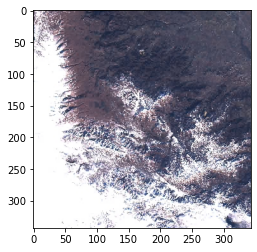

In [12]:
_ = plt.imshow(preview)

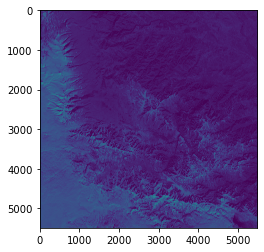

In [13]:

_ = plt.imshow(b8a)

In [16]:
b8a.shape

(5490, 5490)